<a href="https://colab.research.google.com/github/Kambey-san/NNWs_Basic/blob/HW_lesson_08/Course_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Курсовой проект "Обучение нейронной сети на датасете [Fruits-360](https://github.com/Horea94/Fruit-Images-Dataset).

**Количество классов в наборе данных**: 131.


**Размеры изображений**: 100х100.

**Формат изображений**: jpg.

**Статья с описанием набора данных**: Horea Muresan, Mihai Oltean, [Fruit recognition from images using deep learning](https://www.researchgate.net/publication/321475443_Fruit_recognition_from_images_using_deep_learning), Acta Univ. Sapientiae, Informatica Vol. 10, Issue 1, pp. 26-42, 2018.

In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt
from google.colab import files
%matplotlib inline

### Загружаем данные

In [2]:
!wget https://github.com/Horea94/Fruit-Images-Dataset/archive/master.zip -O master.zip

--2023-09-18 17:40:35--  https://github.com/Horea94/Fruit-Images-Dataset/archive/master.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/Horea94/Fruit-Images-Dataset/zip/refs/heads/master [following]
--2023-09-18 17:40:35--  https://codeload.github.com/Horea94/Fruit-Images-Dataset/zip/refs/heads/master
Resolving codeload.github.com (codeload.github.com)... 140.82.114.9
Connecting to codeload.github.com (codeload.github.com)|140.82.114.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘master.zip’

master.zip              [<=>                 ] 761.30M  24.6MB/s    in 39s     

2023-09-18 17:41:14 (19.6 MB/s) - ‘master.zip’ saved [798281939]



### Распаковка...

In [3]:
!unzip master.zip

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: Fruit-Images-Dataset-master/Training/Tomato 3/147_100.jpg  
  inflating: Fruit-Images-Dataset-master/Training/Tomato 3/148_100.jpg  
  inflating: Fruit-Images-Dataset-master/Training/Tomato 3/149_100.jpg  
  inflating: Fruit-Images-Dataset-master/Training/Tomato 3/150_100.jpg  
  inflating: Fruit-Images-Dataset-master/Training/Tomato 3/151_100.jpg  
  inflating: Fruit-Images-Dataset-master/Training/Tomato 3/152_100.jpg  
  inflating: Fruit-Images-Dataset-master/Training/Tomato 3/153_100.jpg  
  inflating: Fruit-Images-Dataset-master/Training/Tomato 3/154_100.jpg  
  inflating: Fruit-Images-Dataset-master/Training/Tomato 3/155_100.jpg  
  inflating: Fruit-Images-Dataset-master/Training/Tomato 3/156_100.jpg  
  inflating: Fruit-Images-Dataset-master/Training/Tomato 3/157_100.jpg  
  inflating: Fruit-Images-Dataset-master/Training/Tomato 3/158_100.jpg  
  inflating: Fruit-Images-Dataset-master/Training/Tomato

### Создаем Tensorflow datasets

In [4]:
batch_size=256  # размер мини-выборки
image_size=(100, 100)   # размер изображений 100Х100

**Набор данных для обучения**

In [5]:
# image_dataset_from_directory -- утилита, создаёт датасет из каталога с изображениями! (1 класс в 1 каталоге!)
train_dataset = image_dataset_from_directory('Fruit-Images-Dataset-master/Training',  # каталог
                                             subset='training',   # указываем поднабор (для "обучения")
                                             seed=42, # начальные значения для генератора случ.числел, т.к. делим набор данных на обучающий и проверочный!
                                             validation_split=0.1,  # 10% от набора для обучения исп. как проверочный
                                             batch_size=batch_size,
                                             image_size=image_size)

Found 67692 files belonging to 131 classes.
Using 60923 files for training.


**Проверочный набор данных**

In [6]:
validation_dataset = image_dataset_from_directory('Fruit-Images-Dataset-master/Training',
                                             subset='validation',
                                             seed=42,
                                             validation_split=0.1,
                                             batch_size=batch_size,
                                             image_size=image_size)

Found 67692 files belonging to 131 classes.
Using 6769 files for validation.


### Создаём набор данных для тестирования

In [7]:
test_dataset = image_dataset_from_directory('Fruit-Images-Dataset-master/Test',
                                             batch_size=batch_size,
                                             image_size=image_size)

Found 22688 files belonging to 131 classes.


Список классов в наборах данных.

In [8]:
class_names = train_dataset.class_names
class_names

['Apple Braeburn',
 'Apple Crimson Snow',
 'Apple Golden 1',
 'Apple Golden 2',
 'Apple Golden 3',
 'Apple Granny Smith',
 'Apple Pink Lady',
 'Apple Red 1',
 'Apple Red 2',
 'Apple Red 3',
 'Apple Red Delicious',
 'Apple Red Yellow 1',
 'Apple Red Yellow 2',
 'Apricot',
 'Avocado',
 'Avocado ripe',
 'Banana',
 'Banana Lady Finger',
 'Banana Red',
 'Beetroot',
 'Blueberry',
 'Cactus fruit',
 'Cantaloupe 1',
 'Cantaloupe 2',
 'Carambula',
 'Cauliflower',
 'Cherry 1',
 'Cherry 2',
 'Cherry Rainier',
 'Cherry Wax Black',
 'Cherry Wax Red',
 'Cherry Wax Yellow',
 'Chestnut',
 'Clementine',
 'Cocos',
 'Corn',
 'Corn Husk',
 'Cucumber Ripe',
 'Cucumber Ripe 2',
 'Dates',
 'Eggplant',
 'Fig',
 'Ginger Root',
 'Granadilla',
 'Grape Blue',
 'Grape Pink',
 'Grape White',
 'Grape White 2',
 'Grape White 3',
 'Grape White 4',
 'Grapefruit Pink',
 'Grapefruit White',
 'Guava',
 'Hazelnut',
 'Huckleberry',
 'Kaki',
 'Kiwi',
 'Kohlrabi',
 'Kumquats',
 'Lemon',
 'Lemon Meyer',
 'Limes',
 'Lychee',
 'M

### Посмотрим примеры изображений:

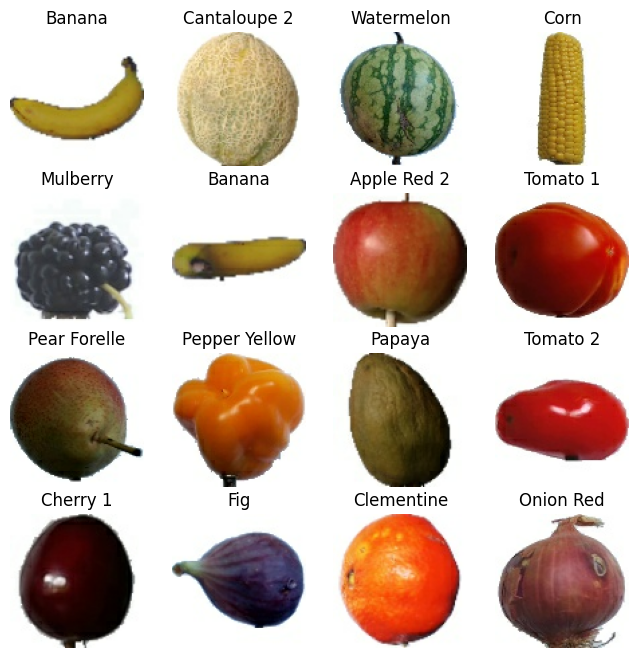

In [9]:
plt.figure(figsize=(8, 8))
for images, labels in train_dataset.take(1):
  for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

### Оптимизируем производительность TensorFlow datasets

In [10]:
# метод prefetch -- предварительная загрузка нескольких минивыборок (ускоряем процесс)

AUTOTUNE = tf.data.experimental.AUTOTUNE    # автоматическая настройка

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

## Создаем нейронную сеть

In [11]:
# Создаем последовательную модель
model = Sequential()
# Сверточный слой
model.add(Conv2D(16, (5, 5), padding='same',
                 input_shape=(100, 100, 3), activation='relu'))
# Слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Сверточный слой
model.add(Conv2D(32, (5, 5), activation='relu', padding='same'))
# Слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Сверточный слой
model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
# Слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Сверточный слой
model.add(Conv2D(128, (5, 5), activation='relu', padding='same'))
# Слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Полносвязная часть нейронной сети для классификации
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
# Выходной слой, 131 нейрон по количеству классов
model.add(Dense(131, activation='softmax'))

**Компилируем модель**

In [12]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

## Обучаем нейронную сеть

In [13]:
history = model.fit(train_dataset,
                    validation_data=validation_dataset,
                    epochs=5,
                    verbose=2)

Epoch 1/5
238/238 - 35s - loss: 1.9710 - accuracy: 0.6341 - val_loss: 0.0502 - val_accuracy: 0.9864 - 35s/epoch - 149ms/step
Epoch 2/5
238/238 - 18s - loss: 0.0922 - accuracy: 0.9700 - val_loss: 0.0169 - val_accuracy: 0.9951 - 18s/epoch - 77ms/step
Epoch 3/5
238/238 - 19s - loss: 0.0542 - accuracy: 0.9827 - val_loss: 0.0163 - val_accuracy: 0.9939 - 19s/epoch - 78ms/step
Epoch 4/5
238/238 - 18s - loss: 0.0350 - accuracy: 0.9887 - val_loss: 0.0087 - val_accuracy: 0.9978 - 18s/epoch - 75ms/step
Epoch 5/5
238/238 - 19s - loss: 0.0392 - accuracy: 0.9877 - val_loss: 0.0087 - val_accuracy: 0.9976 - 19s/epoch - 79ms/step


## Оцениваем качество обучения сети

In [14]:
# Оцениваем качество обучения модели на тестовых данных
scores = model.evaluate(test_dataset, verbose=1)
print("Доля верных ответов на тестовых данных:", round(scores[1] * 100, 2), "%")

89/89 [==============================] - 6s 62ms/step - loss: 0.3245 - accuracy: 0.9461
Доля верных ответов на тестовых данных: 94.61 %


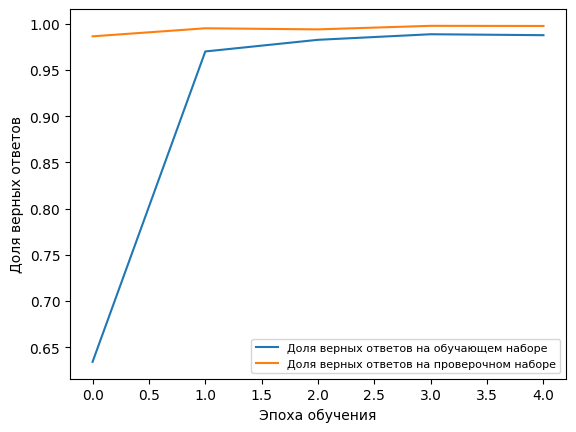

In [15]:
plt.plot(history.history['accuracy'], label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.rc('font', size= 8)
plt.legend()
plt.show()

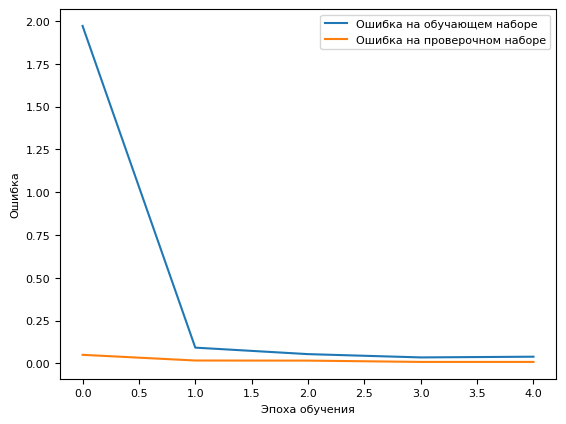

In [16]:
plt.plot(history.history['loss'], label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

## При необходимости сохраняем модель

In [17]:
#model.save("fruits_360_model.h5")

In [18]:
## -- скачиваем
#files.download("fruits_360_model.h5")

**Вывод:** в целом, архитектура данной НС схожа с описанной в <a href = 'https://www.researchgate.net/publication 321475443_Fruit_recognition_from_images_using_deep_learning'>статье </a>. По сути, это обычная свёрточная НС, однако, поскольку  решалась задача многоклассовой классификации, то использовалась функция потерь sparse categorical crossentropy. Применение Dropout, оптимизатора adam и оптимального количества эпох похпозволило избавиться от переобучения модели.